Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

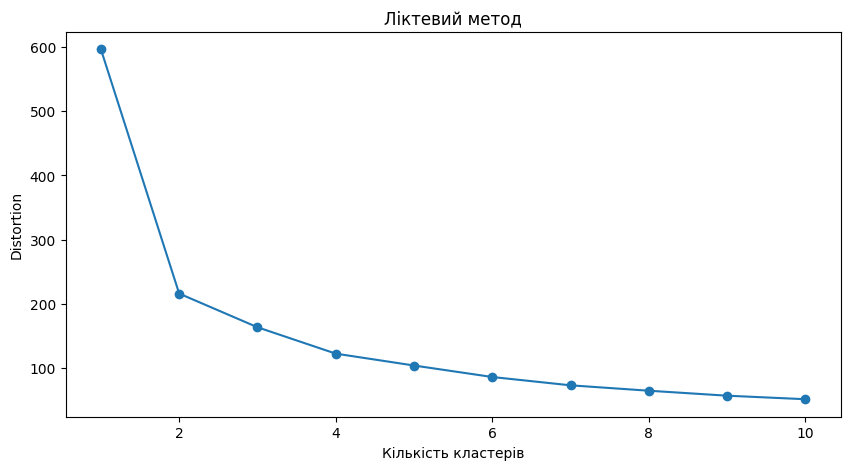

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

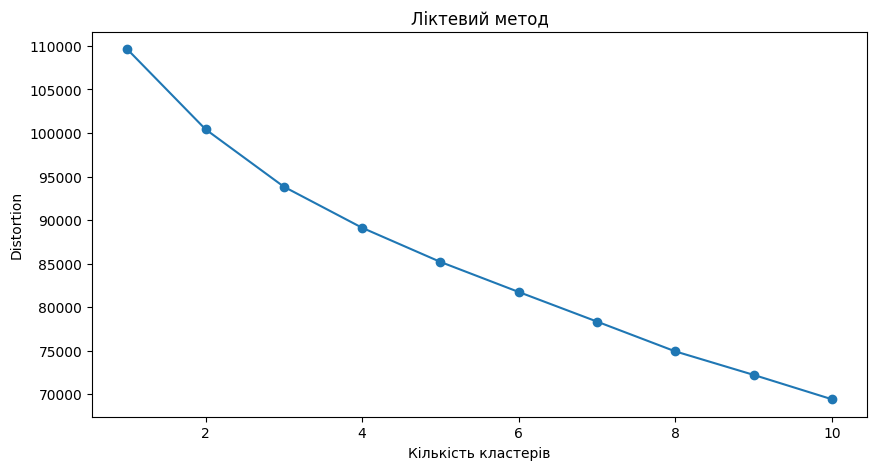

In [4]:
#Завдання 1
#У цьому завданні вам потрібно завантажити ось цей датасет.
#Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist.
#Для кожного з них застосуйте алгоритм K-means для кластеризації.
#Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import drive
import os

# Підключаємо Google Drive
drive.mount('/content/drive')
path_2d = '/content/drive/My Drive/Hw6/data_2d.csv'
path_mnist = '/content/drive/My Drive/Hw6/mnist.csv'

data_2d = pd.read_csv(path_2d)
data_mnist = pd.read_csv(path_mnist)
mnist = load_digits()
data_mnist = mnist.data

scaler_2d = StandardScaler()
data_2d_scaled = scaler_2d.fit_transform(data_2d)

scaler_mnist = StandardScaler()
data_mnist_scaled = scaler_mnist.fit_transform(data_mnist)

# Функція для застосування K-means та ліктевого методу
def apply_kmeans_elbow(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Побудова графіку ліктевого методу
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Distortion')
    plt.title('Ліктевий метод')
    plt.show()

# Застосування K-means та ліктевого методу для двовимірного датасету
apply_kmeans_elbow(data_2d_scaled)

# Застосування K-means та ліктевого методу для MNIST датасету
apply_kmeans_elbow(data_mnist_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


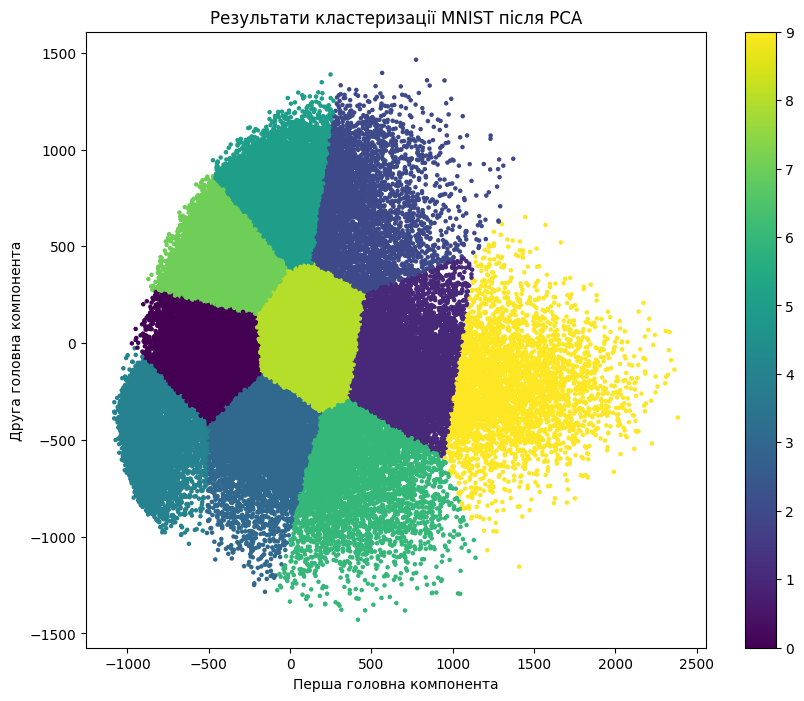

In [5]:
#Завдання 2
#Візуалізуйте результат роботи кластеризації.
#Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA
#щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Завантаження датасету MNIST
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target

# Застосування PCA для зменшення розмірності до 2-вимірного варіанту
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Кластеризація за допомогою K-means
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=5)
plt.colorbar()
plt.title('Результати кластеризації MNIST після PCA')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()